In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [211]:
df = pd.read_csv("data/karlskrona/smhi-lufttemperatur.csv", sep=";")

In [212]:
df

Datum Tid (UTC)  Lufttemperatur Kvalitet
0       2010-03-01  00:00:00             2.0        G
1       2010-03-01  01:00:00             2.2        Y
2       2010-03-01  02:00:00             2.2        Y
3       2010-03-01  03:00:00             1.7        G
4       2010-03-01  04:00:00             1.7        Y
...            ...       ...             ...      ...
108214  2022-08-01  02:00:00            16.2        G
108215  2022-08-01  03:00:00            16.0        G
108216  2022-08-01  04:00:00            16.1        G
108217  2022-08-01  05:00:00            17.4        G
108218  2022-08-01  06:00:00            17.8        G

[108219 rows x 4 columns]

### Data preprocessing

In [335]:
def transform(df_: pd.DataFrame) -> pd.DataFrame:
    return (df_
        .rename(columns={"Lufttemperatur": "y", "Kvalitet": "quality"})
        .assign(ds=pd.to_datetime(df_["Datum"] + " " + df_["Tid (UTC)"]))
        .query("quality != 'Y'")
        .loc[:, ["temperature"]]
        .astype({"temperature": np.int8}))

In [319]:
weather = transform(df)

In [322]:
weather

temperature
date                            
2010-03-01 00:00:00            2
2010-03-01 03:00:00            2
2010-03-01 06:00:00            1
2010-03-01 09:00:00            1
2010-03-01 12:00:00            2
...                          ...
2022-08-01 02:00:00           16
2022-08-01 03:00:00           16
2022-08-01 04:00:00           16
2022-08-01 05:00:00           17
2022-08-01 06:00:00           18

[105883 rows x 1 columns]

In [323]:
weather.index.min(), weather.index.max()

(Timestamp('2010-03-01 00:00:00'), Timestamp('2022-08-01 06:00:00'))

In [324]:
weather.isna().sum()

temperature    0
dtype: int64

### Data exploration

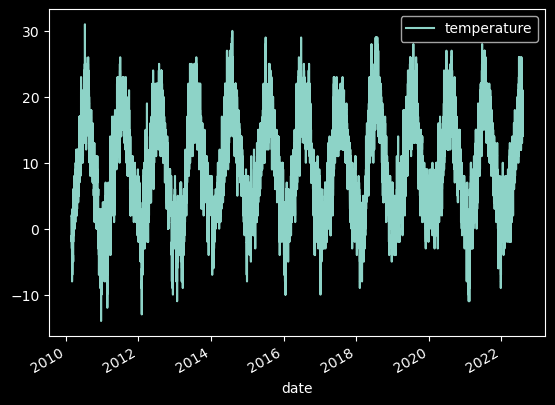

In [325]:
weather.plot();

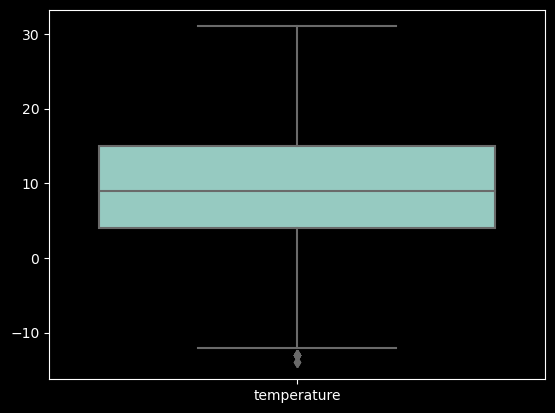

In [326]:
sns.boxplot(data=weather);

### 1. Spliting

In [ ]:
# split data into predictors and response
train = weather[weather['ds'] < pd.Timestamp('2019-01-01')]
test = weather[weather['ds'] >= pd.Timestamp('2019-01-01')]

In [ ]:
# fit model - ignore train/test split for now
m = Prophet()
m.fit(train)

### 2. Modeling

### 3. Evaluatiation